# Visualize the data

In [2]:
word_frequency_list = []

file_path = "/Users/hannojacobs/MIT805_datasets/mapreduced_tweet_fields/post_processed_tweet_fields/ordered_text_words.txt"

with open(file_path, "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            word = parts[0]
            frequency = int(parts[1])
            word_frequency_list.append([word, frequency])

print(word_frequency_list[0:100])

[['ukraine', 3098], ['russia', 1422], ['putin', 1235], ['war', 1191], ['standwithukraine', 793], ['nato', 628], ['russian', 596], ['peace', 569], ['world', 540], ['people', 527], ['today', 445], ['breaking', 437], ['kyiv', 406], ['news', 399], ['russians', 384], ['ukrainian', 361], ['help', 344], ['please', 344], ['them', 331], ['stop', 318], ['ukrainians', 318], ['children', 310], ['china', 310], ['country', 308], ['europe', 305], ['mariupol', 292], ['slavaukraini', 286], ['zelensky', 277], ['march', 271], ['sanctions', 271], ['president', 270], ['trump', 270], ['freedom', 267], ['covid', 265], ['out', 262], ['support', 260], ['love', 257], ['video', 255], ['nazis', 254], ['usa', 253], ['refugees', 252], ['russias', 252], ['days', 251], ['putins', 251], ['invasion', 249], ['civilians', 247], ['watch', 246], ['poland', 244], ['west', 244], ['biden', 242], ['right', 236], ['kharkiv', 234], ['go', 233], ['amp', 232], ['new', 232], ['uk', 232], ['good', 231], ['live', 228], ['gt', 225], [

# Plot the most common words in a histogram

[['russia', 1422], ['putin', 1235], ['war', 1191], ['standwithukraine', 793], ['nato', 628], ['russian', 596], ['peace', 569], ['world', 540], ['people', 527], ['today', 445], ['breaking', 437], ['kyiv', 406], ['news', 399], ['russians', 384], ['ukrainian', 361], ['help', 344], ['please', 344], ['them', 331], ['stop', 318], ['ukrainians', 318], ['children', 310], ['china', 310], ['country', 308], ['europe', 305], ['mariupol', 292], ['slavaukraini', 286], ['zelensky', 277], ['march', 271], ['sanctions', 271]]


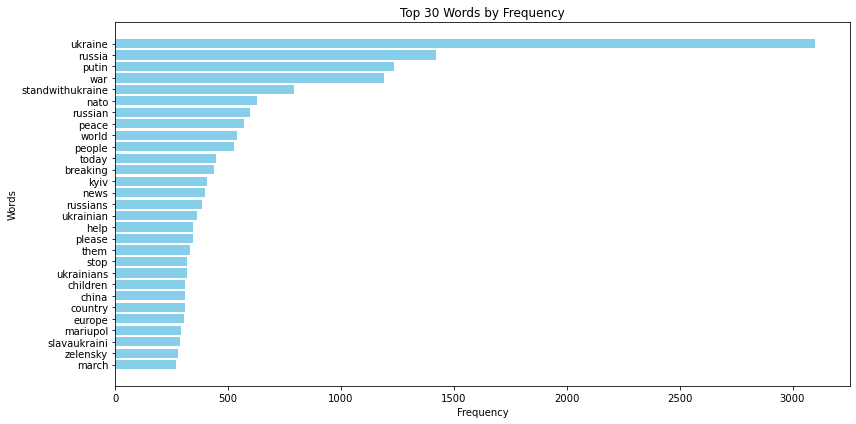

In [3]:
import matplotlib.pyplot as plt

print(word_frequency_list[1:30])

num_words_to_take = 30
top_X_words_and_freq = word_frequency_list[0:num_words_to_take-1]
top_X_words, top_X_freq = zip(*top_X_words_and_freq)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.barh(top_X_words, top_X_freq, color='skyblue')
plt.gca().invert_yaxis()  # Reverse the order to have the most common word at the top
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {num_words_to_take} Words by Frequency')
plt.tight_layout()
plt.show()

## Get average weighted sentiment of most common words

In [4]:
from textblob import TextBlob

# take the most common 100 words and get their total sentiment
num_words_to_take = 100
top_X_words_and_freq = word_frequency_list[0:num_words_to_take-1]

# get the weighted average sentiment
total_unweighted_sentiment = 0
total_weighted_sentiment = 0
total_occurances_of_words = 0
for word, freq in top_X_words_and_freq:
    blob = TextBlob(word)
    word_sentiment = blob.sentiment.polarity
    total_unweighted_sentiment += word_sentiment
    total_weighted_sentiment += word_sentiment*freq
    total_occurances_of_words += freq
    print(f"freq = {freq}, word = {word}, sentiment = {word_sentiment}")

freq = 3098, word = ukraine, sentiment = 0.0
freq = 1422, word = russia, sentiment = 0.0
freq = 1235, word = putin, sentiment = 0.0
freq = 1191, word = war, sentiment = 0.0
freq = 793, word = standwithukraine, sentiment = 0.0
freq = 628, word = nato, sentiment = 0.0
freq = 596, word = russian, sentiment = 0.0
freq = 569, word = peace, sentiment = 0.0
freq = 540, word = world, sentiment = 0.0
freq = 527, word = people, sentiment = 0.0
freq = 445, word = today, sentiment = 0.0
freq = 437, word = breaking, sentiment = 0.0
freq = 406, word = kyiv, sentiment = 0.0
freq = 399, word = news, sentiment = 0.0
freq = 384, word = russians, sentiment = 0.0
freq = 361, word = ukrainian, sentiment = 0.0
freq = 344, word = help, sentiment = 0.0
freq = 344, word = please, sentiment = 0.0
freq = 331, word = them, sentiment = 0.0
freq = 318, word = stop, sentiment = 0.0
freq = 318, word = ukrainians, sentiment = 0.0
freq = 310, word = children, sentiment = 0.0
freq = 310, word = china, sentiment = 0.0
fr

## Show the average sentiments

In [5]:
avg_weighted_sentiment = total_weighted_sentiment/total_occurances_of_words
avg_unweighted_sentiment = total_unweighted_sentiment/num_words_to_take
print(f"avg_weighted_sentiment = {avg_weighted_sentiment}")
print(f"avg_unweighted_sentiment = {avg_unweighted_sentiment}")

avg_weighted_sentiment = 0.019335522534243046
avg_unweighted_sentiment = 0.028584415584415584


Here the average sentiments are both positive which is not what we would expect in war time.

However, if we take a look at the printed sentiments for each of the words above, most have no sentiment related to them and are neutral.

Therefore, this analysis is somewhat pointless.